# Comments Sentiment

## Import libraries

In [1]:
%matplotlib inline
#include libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#SkLearn 
from numpy import linalg
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

## Declaration constants

In [2]:
picture_width = 18
picture_height = 5
#
forecast_horizon = 96
planning_horizon_interval = 2
training_set_points = forecast_horizon * planning_horizon_interval
amount_records = 199
amount_training_records = 150
amount_directions = 20

## Load Data

In [3]:
path_to_data = '/users/tranhieu/Desktop/Bachelor/Data/'
path_to_figures = '/users/tranhieu/Desktop/Bachelor/Data/'

posts = pd.read_csv( path_to_data + 'vector_clustering_positive_200posts.csv', index_col=False, header=None)

load_data = []

for i in range(1):
    load_data[len(load_data):] = [ pd.read_csv( path_to_data + 'vector_clustering_positive_200posts.csv', index_col=False, header=None) ]

load_data[0].head(amount_records)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Christie endorses Trump in shock move,0.1709,0.1347,0.1341,0.1340,0.1333,0.1348,0.1362,0.1366,0.1389,...,0.1407,0.1408,0.1413,0.1414,0.1437,0.1481,0.1523,0.1584,0.1583,0.1604
1,Cruz and Robio attrack Trump in US election de...,0.1243,0.1543,0.1444,0.1417,0.1396,0.1393,0.1398,0.1374,0.1358,...,0.1329,0.1352,0.1371,0.1362,0.1366,0.1377,0.1364,0.1361,0.1351,0.1345
2,US election: Highlights from the Republican de...,0.3286,0.1921,0.1701,0.1589,0.1546,0.1449,0.1545,0.1588,0.1614,...,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460,0.1460
3,US election 2016: Republicans to battle in Tex...,0.3478,0.2241,0.1846,0.1615,0.1530,0.1454,0.1353,0.1264,0.1323,...,0.1216,0.1206,0.1164,0.1224,0.1184,0.1200,0.1190,0.1156,0.1156,0.1156
4,US election 2016: Did socialism save this US t...,0.0995,0.1129,0.1213,0.1146,0.1122,0.1117,0.1097,0.1124,0.1180,...,0.1188,0.1171,0.1159,0.1148,0.1162,0.1150,0.1139,0.1128,0.1175,0.1164
5,US election 2016: Trump wins big in Nevada,0.1858,0.1799,0.1725,0.1652,0.1593,0.1572,0.1602,0.1587,0.1579,...,0.1598,0.1608,0.1609,0.1591,0.1588,0.1590,0.1591,0.1578,0.1568,0.1581
6,US election 2016: Jeb Bush drops out of Republ...,0.1703,0.1475,0.1502,0.1463,0.1425,0.1414,0.1458,0.1530,0.1564,...,0.1586,0.1618,0.1673,0.1710,0.1690,0.1678,0.1673,0.1694,0.1687,0.1671
7,US Election: Jeb Bush drops out of presidentia...,0.0483,0.1404,0.1401,0.1615,0.1691,0.1717,0.1664,0.1614,0.1582,...,0.1634,0.1621,0.1621,0.1568,0.1543,0.1604,0.1643,0.1609,0.1579,0.1579
8,US Election: Donald Trump wins in South Carolina,0.1802,0.1491,0.1462,0.1458,0.1425,0.1407,0.1389,0.1387,0.1441,...,0.1443,0.1455,0.1447,0.1442,0.1426,0.1424,0.1428,0.1421,0.1435,0.1453
9,US election 2016: Hillary Clinton 'wins Nevada...,0.1925,0.1946,0.2070,0.1955,0.1910,0.1888,0.1846,0.1809,0.1781,...,0.1801,0.1791,0.1762,0.1736,0.1711,0.1717,0.1716,0.1721,0.1723,0.1757


## Explore the time series. 

In [4]:
# Tesing read data
load_data[0][0:1][1]
# Get list
list_post = [None] * len(load_data[0])
for j in range(len(list_post)):
    list_post[j] = []
    for i in range(1,amount_directions + 1):
        list_post[j].append(load_data[0][j:j+1][i])
# Get vectors from posts data
post_vector = []
for i in range(len(list_post)):
    post_vector.append([])
    for j in range(amount_directions):
        post_vector[i].append(list_post[i][j][i])
# print(post_vector)

## Devide into training posts and testing posts

In [5]:
# training_post_vector = post_vector[:amount_training_records]
# testing_post_vector = post_vector[150:]
import random

training_post_vector = []
testing_post_vector = []
curCnt = 0
mark = [False] * amount_records
while curCnt < amount_records - amount_training_records:
    x =  random.randint(0, 198)
    if mark[x] == False:
        curCnt += 1
        testing_post_vector.append(post_vector[x])
        mark[x] = True
for x in range(amount_records):
    if mark[x] == False:
        training_post_vector.append(post_vector[x])

## Visualize all plots

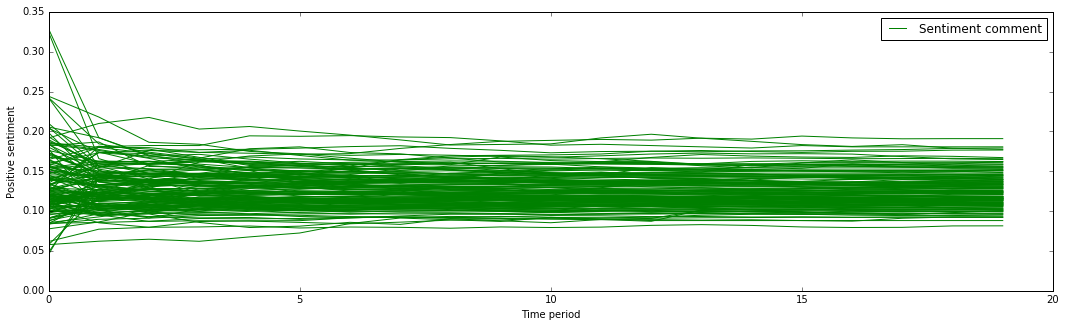

In [6]:
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')
plt.plot(training_post_vector[0], 'g-', label = 'Sentiment comment')
for i in range(1,len(training_post_vector)):
    plt.plot(training_post_vector[i], 'g-')
plt.xlabel('Time period')
plt.ylabel('Positive sentiment')
plt.legend(loc = 'upper right')
plt.savefig(path_to_figures + 'pos_sentiment.png')

## Clustering with K-Means and  MB-Means

False
Silhouette Coefficient (K Means): 0.611
Silhouette Coefficient (MB Means): 0.616


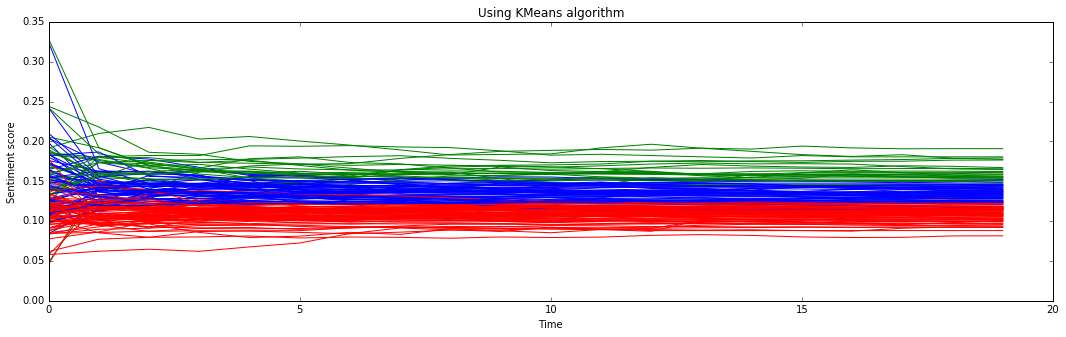

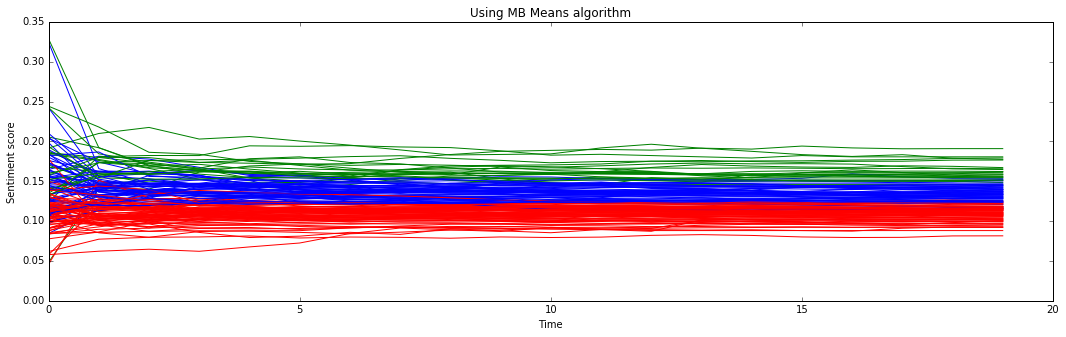

In [7]:
patterns = np.array(training_post_vector)
patterns.shape = (amount_training_records, amount_directions)

#eliminate the masks
mask = np.isnan(patterns)
patterns[mask] = patterns[0][0]

number_of_clusters = len(patterns)

n_clusters_en = 3

pt = patterns[:number_of_clusters:]

#K means
k_means_en = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
t0 = time.time()
k_means_en.fit(pt)
t_batch = time.time() - t0

k_means_labels_en = k_means_en.labels_
k_means_cluster_centers_en = k_means_en.cluster_centers_
k_means_labels_unique_en = np.unique(k_means_labels_en)


#MBK
batch_size = 45
mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters_en, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(pt)
t_mini_batch = time.time() - t0
mbk_means_labels = mbk.labels_
mbk_means_cluster_centers = mbk.cluster_centers_
mbk_means_labels_unique = np.unique(mbk_means_labels)


# Plot result

fig = plt.figure(figsize=(3, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.


print (np.isnan(np.min(post_vector)))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if k_means_labels_en[i] == 0:
        clr = 'r-'

    if k_means_labels_en[i] == 1:
        clr = 'b-'
        
    if k_means_labels_en[i] == 2:
        clr = 'g-'
        
#     if k_means_labels_en[i] == 3:
#         clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Sentiment score')
plt.title('Using KMeans algorithm')

#MBK
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if mbk_means_labels[i] == 0:
        clr = 'r-'

    if mbk_means_labels[i] == 1:
        clr = 'b-'
        
    if mbk_means_labels[i] == 2:
        clr = 'g-'
        
#     if mbk_means_labels[i] == 3:
#         clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Sentiment score')
plt.title('Using MB Means algorithm')

print("Silhouette Coefficient (K Means): %0.3f"
      % metrics.silhouette_score(pt, k_means_labels_en, metric='sqeuclidean'))

print("Silhouette Coefficient (MB Means): %0.3f"
      % metrics.silhouette_score(pt, mbk_means_labels, metric='sqeuclidean'))

## Visualize separately clusters

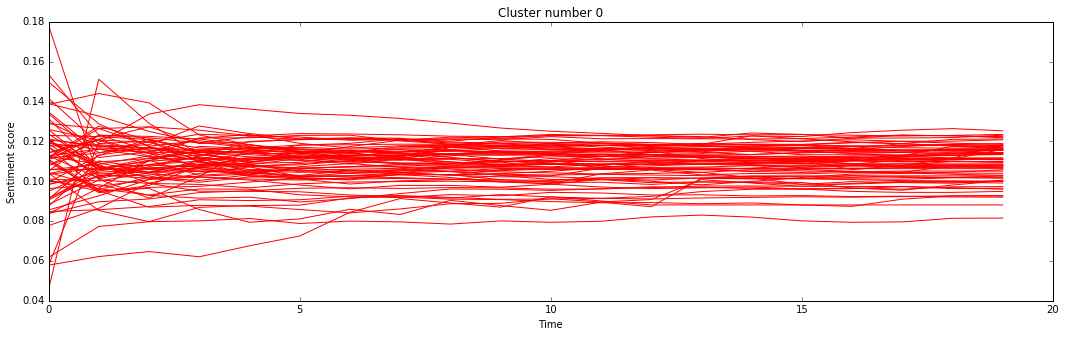

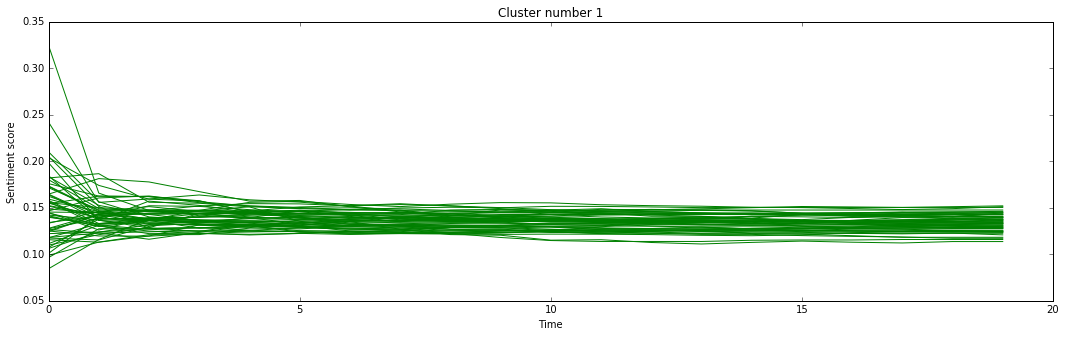

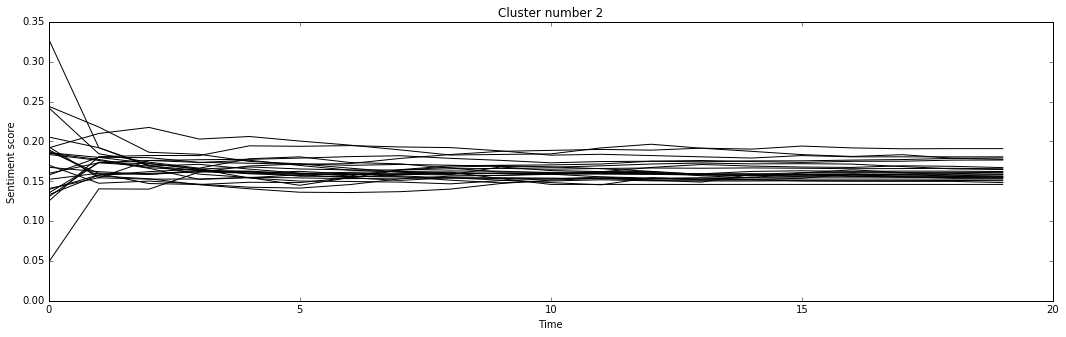

In [8]:
#draw each cluster
numToColor = ['r-', 'g-', 'k-', 'b-', 'y-']
for number_of_cluster in range(n_clusters_en):
    mask= np.where(k_means_labels_en == number_of_cluster)
    pt_0 = pt[mask]

    plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
    clr = numToColor[number_of_cluster]
    for i in range(0,len(pt_0)):
        plt.plot(pt_0[i], clr, label = 'Label')    
    plt.xlabel('Time')
    plt.ylabel('Sentiment score')
    plt.title('Cluster number ' + str(number_of_cluster))

## Implement cluster testing data

Result lables after training : 
[2 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 2 1 1 2 0 0 1 0 2 0 2 1 0
 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 2 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1
 1 0]
center of clusters :
[[ 0.1087619   0.11061429  0.11117619  0.11220714  0.1123381 ]
 [ 0.15708814  0.15140847  0.14944407  0.14742712  0.14632881]
 [ 0.25414286  0.18828571  0.17477143  0.16988571  0.16808571]]
label unique:
[0 1 2]
Result Test
[0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 2 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 1 2 2 0]
Done!


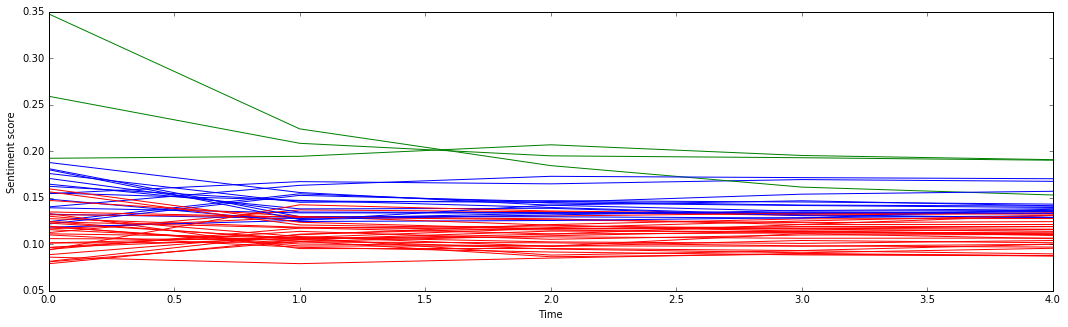

In [9]:
# testing_post_vector -> for testing
# training_post_vector -> for traning
# We choose the first 5 period to implement training and clustering for topic
amount_training = 5
patterns_short = []
for i in range(len(training_post_vector)):
    patterns_short.append([])
    for j in range(amount_training):
        patterns_short[i].append(training_post_vector[i][j])
patterns_short = np.array(patterns_short)

patterns_short.shape = (amount_training_records, amount_training)
n_clusters_en = 3

mask = np.isnan(patterns_short)
patterns_short[mask] = patterns_short[0][0]

number_of_clusters = len(patterns_short)

k_means_en = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
# get begining time
t0 = time.time()

k_means_en.fit(patterns_short)

# count runing time
t_batch = time.time() - t0

k_means_labels_en = k_means_en.labels_
print('Result lables after training : ')
print(k_means_labels_en)

k_means_cluster_centers_en = k_means_en.cluster_centers_
print('center of clusters :')
print(k_means_cluster_centers_en)

k_means_labels_unique_en = np.unique(k_means_labels_en)
print('label unique:')
print(k_means_labels_unique_en)

colors = ['r-', 'b-', 'g-']

# Testing
dataTest = []
for i in range(len(testing_post_vector)):
    dataTest.append([])
    for j in range(amount_training):
        dataTest[i].append(testing_post_vector[i][j])
# Function implement prediction post by the first 5 period time        
resLabel = k_means_en.predict(dataTest)
print('Result Test')
print(resLabel)

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=1000, facecolor='w', edgecolor='k')    
for i in range(0, len(dataTest)):
    clr = colors[resLabel[i]]
    plt.plot(dataTest[i], clr)    
plt.xlabel('Time')
plt.ylabel('Sentiment score')
print('Done!')

## Calculate MAD

In [10]:
# Function to find index of nearest post with the currently test
def find_nearest_id(cluster, index):
    vmin = 2000000000
    nearest_id = -1
    for i in range(len(training_post_vector)):
        if (k_means_labels_en[i] == cluster):
            dist = 0
            for j in range(amount_training):
                dist += abs(training_post_vector[i][j] - testing_post_vector[index][j])
            if vmin > dist:
                vmin = dist
                nearest_id = i
    return nearest_id

# Function to find value of MEA
def cal_MAD(testId, trainId):
    MAE = 0
    for i in range(amount_training, amount_directions):
        MAE += abs(training_post_vector[trainId][i] - testing_post_vector[testId][i])
    MAE /= (amount_directions - amount_training)
    return MAE
# Class table MAD
class ListTable(list):
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
table = ListTable()
table.append(['Testing post', 'MAD'])

# Calculate the nearest post and calculate MEA for every post
predict_n_real = []
for i in range(len(testing_post_vector)):
    nearest_id = find_nearest_id(resLabel[i], i)
    valMAD = cal_MAD(i, nearest_id)
    predict_n_real.append([nearest_id,i, valMAD])
    table.append([i, valMAD])
#     print('>> Test post ', i, ' :')
#     print('Nearest index post = ', nearest_id)
#     print('MAD  = ', valMAD , '\n')
column = 2
ss = sum(row[column] for row in predict_n_real)
print("%.4f" % (ss / 49.0))

0.0085


## Visualize plot of a post prediction and the MEA

Value MEA =  0.00120666666667


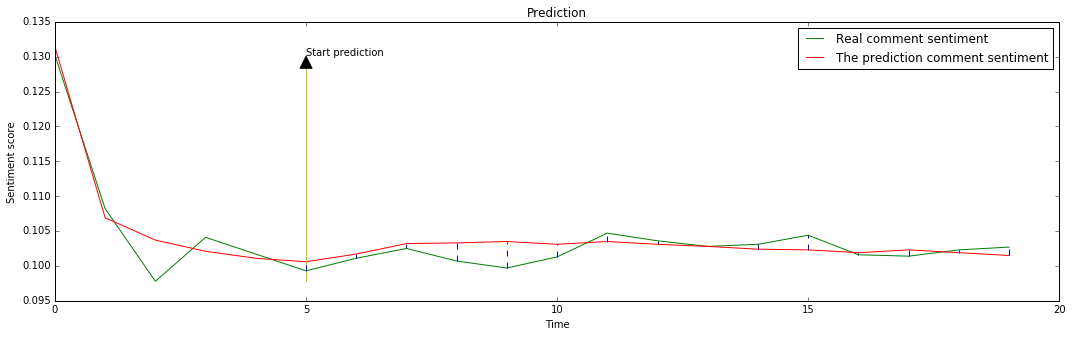

In [11]:
colors = ['r-', 'b-', 'g-']
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')
indexPost = 30
for i in range(len(testing_post_vector)):
    if predict_n_real[i][1] < predict_n_real[indexPost][1]:
        indexPost = i

for i in range(indexPost,indexPost+1):
    clr_real = 'g-'
    clr_predict = 'r-'
    plt.plot(testing_post_vector[predict_n_real[i][1]], clr_real, label = 'Real comment sentiment')
    plt.plot(training_post_vector[predict_n_real[i][0]], clr_predict, label = 'The prediction comment sentiment')
    ymax = max(testing_post_vector[predict_n_real[i][1]])
    ymin = min(testing_post_vector[predict_n_real[i][1]])
    plt.plot([amount_training, amount_training], [ymin, ymax], 'y-')
    plt.annotate('Start prediction', xy=(amount_training, ymax), xytext=(amount_training, ymax),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
    for j in range(amount_training, amount_directions):
        vlow = min(testing_post_vector[predict_n_real[i][1]][j] , training_post_vector[predict_n_real[i][0]][j])
        vhigh = max(testing_post_vector[predict_n_real[i][1]][j] , training_post_vector[predict_n_real[i][0]][j])
        plt.plot([j, j], [vlow, vhigh], 'b-', linestyle='--')
    print('Value MEA = ', predict_n_real[i][2])
    

plt.xlabel('Time')
plt.ylabel('Sentiment score')
plt.title('Prediction')
plt.legend(loc = 'upper right')

# the histogram of MAD values

In [12]:
path_to_mad = '/users/tranhieu/Desktop/Bachelor/Data/'

mads = pd.read_csv( path_to_mad + 'Experiment_MAD.csv', index_col=False, header=0)
mads['Experiment']
mads['MAD']
d = {'exp 1': 0.0093, 'exp 2': 0.007, 'exp 3': 0.0085, 'exp 4': 0.008, 'exp 5': 0.0097,'exp 6': 0.0075,'exp 7': 0.0081,'exp 8': 0.00726,'exp 9': 0.0085,'exp 10': 0.0063}


plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys(), rotation=25)
plt.xlabel('Experiment')
plt.ylabel('MAE values')
# plt.title('Histogram of 'MAD values in experiment)
plt.axis([, 10, 0, 0.01])
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-4d07f71ade5e>, line 14)

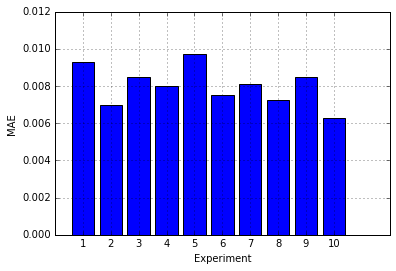

In [14]:
values = [0.0093,
0.007,
0.0085,
0.008,
0.0097,
0.0075,
0.0081,
0.00726,
0.0085,
0.0063]
indexes = [1,2,3,4,5,6,7,8,9,10]
labels = indexes
width = 0.8
plt.bar(indexes, values, width, align='center')
plt.xticks(indexes, labels )
plt.xlabel('Experiment')
plt.ylabel('MAE')
plt.axis([0, 12, 0, 0.012])
plt.grid(True)
plt.show()

In [104]:
data = [1, 5, 1, 1, 6, 3, 3, 4, 5, 5, 5, 2, 5]
correlation = [(i, data.count(i)) for i in set(data)]
# correlation.sort(key=lambda x: x[1])
list_ = []
for j in range(len(mads)):
    print(j)
    print(mads[j])
#     list_.append(mads[j:j+1][1])
#     for i in range(1,amount_directions + 1):
#         list_post[j].append(load_data[0][j:j+1][i])

# labels, values = zip(*correlation)

# indexes = np.arange(len(correlation))
# width = 1

# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels)
# plt.show()

0


KeyError: 0

In [60]:
mads
mads[0]
# d = {'apples': 5, 'oranges': 2, 'bananas': 2, 'lemons': 1, 'coconuts': 1}

# plt.bar(range(len(load_data[0])), load_data[0].values(), align='center')
# plt.xticks(range(len(load_data[0])), load_data[0].keys(), rotation=25)
# purchase_plot = load_data[0]['Experiment'].hist(bins=10)
# purchase_plot.set_title("Purchase Patterns")
# purchase_plot.set_xlabel("Order Amount($)")
# purchase_plot.set_ylabel("Number of orders")
# fig = plt.figure()
# ax = fig.add_subplot(111)

# x = []
# for i in range(11):
#     x.append(float(i/100))
#     print(float(i/100))
# numBins = 10

# # ax.hist(x,numBins,color='green',alpha=0.8)
# # load_data[0]['MAD'].hist(bins=20)
# plt.xlabel('Experiment')
# plt.ylabel('MAD values')
# # plt.title('Histogram of 'MAD values in experiment)
# plt.axis([1, 10, 0, 0.01])
# plt.grid(True)
# plt.show()

KeyError: 0